In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplotlib
from datetime import datetime
from scipy.stats import norm
import seaborn as sns
import pandas as pd
import time as time
import fileinput
import itertools

In [2]:
#path = "../Data_ExcelAcquisition/Configuration_3/C7500_M1700_ThGUp1350_ThGDn50pos_TPC1350/"
# path = "../Data_ExcelAcquisition/Configuration_3/C7500_M1700_ThGUp1200_ThGDn200pos_TPC1350/"

# tot_evt = 450       # 200
# volt_lim = -0.009
# sat_lim = 0.03
# Amp_good_int = 0.00007 
# Max_good_amp = 0.75
# trig_offset = 0 # -3.e-5 

#path = "../Data_ExcelAcquisition/Configuration_4/C7500_M1700_ThGUp1400_ThGDn0pos_TPC1350/" #tot_evt = 200
#path = "../Data_ExcelAcquisition/Configuration_4/C7500_M1700_ThGUp1400_ThGDn0pos_TPC1350_ii/" #tot_evt = 1000
#path = "../Data_ExcelAcquisition/Configuration_4/C7500_M1700_ThGUp1400_ThGDn0pos_TPC1350_iii/" #tot_evt = 9327
# path = "../Data_ExcelAcquisition/Configuration_4/C7500_LSF1700_ThGUp1400_ThGDn0_PMesh400_TPC1350/" #tot_evt = 300
# in_evt = 0
# tot_evt = 300       # 200
# volt_lim = -0.009
# sat_lim = 0.03
# Amp_good_int = 0.00007 
# Max_good_amp = 0.5#parameter to check for sparks
# trig_offset =  -4.e-5 

#path = "../Data_ExcelAcquisition/Configuration_4/C7500_LSF1700_ThGUp1400_ThGDn0_PMesh200_TPC1350/" #tot_evt = 207
#path = "../Data_ExcelAcquisition/Configuration_5/C7500_LSF1700_ThGUp1400_ThGDnGND_PMesh200_TPC1350/" #tot_evt = 200
#path = "../Data_ExcelAcquisition/Configuration_5/C7600_LSF1720_ThGUp1500_ThGDnGND_PMesh400_TPC1350/"
#path = "../Data_ExcelAcquisition/Configuration_5/C7600_LSF1680_ThGUp1460_ThGDnGND_PMesh400_TPC1350/"#tot_evt = 500


# in_evt = 0
# tot_evt = 500       # 200
# volt_lim = -0.009
# sat_lim = 0.03
# Amp_good_int = 0.00007 
# Max_good_amp = 0.5#parameter to check for sparks
# trig_offset =  -4.e-5 


#Config 7

# path = "../Data_ExcelAcquisition/Configuration_5/ScintUp1100_ScintDn1250_TPCPMT1350_NoDrift/"#tot_evt = 200
#path = "../Data_ExcelAcquisition/Configuration_5/ScintUp1100_ScintDn1250_TPCPMT1350_NoDrift_ii/"#tot_evt = 1000

#path = "../Data_ExcelAcquisition/Configuration_5/C7600_LSF1680_ThGUp1460_ThGDnGND_PMesh400_TPC1350_ii/"#tot_evt = 1000
#path = "../Data_ExcelAcquisition/Configuration_5/C7600_LSF1680_ThGUp1460_ThGDnGND_PMesh400_TPC1350_iii/"#tot_evt = 917
# path = "../Data_ExcelAcquisition/Configuration_5/C7600_LSF1680_ThGUp1460_ThGDnGND_PMesh400_TPC1350_iv/"#6387
#path = "../Data_ExcelAcquisition/Configuration_5/C7600_LSF1680_ThGUp1460_ThGDnGND_PMesh400_TPC1350_2lhFlow/"#1000 event

#Config 6
#path="../Data_ExcelAcquisition/Configuration_6/C8500_LSF1720_ThGUp1460_ThGDnGND_PMesh400_TPC1350/" #tot_evt = 9000

#Config 7

#path ="../Data_ExcelAcquisition/Configuration_7/C8500_LSF1720_ThGUp1460_ThGDnGND_PMesh400_TPC1350/"#tot_evt = 10000
#path = "../Data_ExcelAcquisition/Configuration_7/C7500_LSF1620_ThGUp1400_ThGDnGND_PMesh400_TPC1350/"#tot_evt = 870
#path = "../Data_ExcelAcquisition/Configuration_7/C7500_LSF1620_ThGUp400_ThGDnGND_PMesh400_TPC1350/"#tot-evt = 553

path = "../Data_ExcelAcquisition/Configuration_7/C3500_LSF1480_ThGUp1400_ThGDnGND_PMesh400_TPC1350/"#tot_evt = 959
in_evt = 0
tot_evt = 959
volt_lim = -0.009
sat_lim = 0.01
Amp_good_int = 0.00007 
Max_good_amp = 0.5#parameter to check for sparks
trig_offset =  0. 
baseline_offset = -0.018#studied with the Baseline shift code



filetype = 0
f = path+"result.txt"
#f = open(path+"result.txt",'r')


In [3]:
#parametersfor calculating the integrals
int_UpLim = trig_offset + 32e-6 # the drift time (or some other related time)
int_LowLim = trig_offset - 34e-6 # the drift time (or some other related time)
dt = 100e-6*10e-3# length of acq window * sampling rate
Impedance = 50#50Ohms



#time at the start of program is noted
start = time.time()

ampl_TPC = []
all_ampl_TPC =[]
all_good_evt_flag = []
time_TPC = []
ampl_Scint = []
time_Scint = []
ampl_ScintDn = []
time_ScintDn = []
dum_wf_sum= 0
wf_sum_Scint = []
wf_sum_TPC = []
time_st = []
bin_info=[]
Int_aft = []
Int_bef = []
Int_aft_Fede = []
Int_bef_Fede = []
Int_aft_cut1 = []
Int_bef_cut1 = []
Max_aft = []
Max_aft_time = []
Max_bef_time = []
Max_bef = []
sat_evt = []
sat_evt2 = []
good_evt = []
good_evt_bef = []
evt_no = []
good_evt_flag = []

for i in range(tot_evt):
    ampl_TPC.append([])    
    time_TPC.append([])
    ampl_Scint.append([])
    time_Scint.append([])
    ampl_ScintDn.append([])
    time_ScintDn.append([])
    Int_bef.append(0)
    Int_aft.append(0)
    Int_bef_Fede.append(0)
    Int_aft_Fede.append(0)
    Max_bef.append(-1)
    Max_aft_time.append(-99)
    Max_bef_time.append(-99)
    Max_aft.append(-1)
    evt_no.append(i)
    

    
with open(f) as file:
    for line in file:
        evt_,ch_,time_,ampl_ = line.split(',')
        if (ch_ == "C1" and int(evt_) < tot_evt): 
            ampl_Scint[int(evt_)].append(float(ampl_))   
            time_Scint[int(evt_)].append(float(time_))
        elif (ch_ == "C2" and int(evt_) < tot_evt): 
            ampl_ScintDn[int(evt_)].append(float(ampl_))   
            time_ScintDn[int(evt_)].append(float(time_))       
        elif (ch_ == "C4" and int(evt_) < tot_evt):
            ampl_TPC[int(evt_)].append(float(ampl_) - baseline_offset)
            time_TPC[int(evt_)].append(float(time_))

                
for i in range(len(ampl_TPC[0])):
    wf_sum_Scint.append(0)
    wf_sum_TPC.append(0)

trigger_level = -0.017#volts
   
norm_bef = 0
norm_aft = 0 
for j in range(len(ampl_TPC[0])):
      if (time_TPC[0][j]<trig_offset): 
            norm_bef = norm_bef+1
      elif( time_TPC[0][j] > trig_offset):
            norm_aft = norm_aft+1 
#    wf_sum_Scint.append(dum_wf_sum) 
#    wf_sum_TPC.append(dum_wf_sum_TPC)    
#    time_st.append(time_Scint[0][i])

fake_trigger = 0
good_trigger = 0
Max_aft_cut_idx = []
Int_aft_good = []


#--------------------
#for loop for the integrals before and after the trigger offset 
#--------------------

for i in  range(in_evt,len(ampl_TPC)):
    for j in range(len(ampl_TPC[0])):
        if (time_TPC[i][j]<trig_offset): 
            Int_bef_Fede[i]+=abs(ampl_TPC[i][j])/norm_bef
            Int_bef[i]+=abs(ampl_TPC[i][j]) * dt/(2*Impedance*norm_bef)
            if( Max_bef[i] < abs(ampl_TPC[i][j]) ): 
                Max_bef[i] = abs(ampl_TPC[i][j])
                Max_bef_time[i] = time_TPC[i][j]
        elif (time_TPC[i][j]>trig_offset):
            Int_aft_Fede[i]+=abs(ampl_TPC[i][j])/norm_aft
            Int_aft[i]+=abs(ampl_TPC[i][j]) * dt/(2*Impedance*norm_aft)
            if( Max_aft[i] < abs(ampl_TPC[i][j]) ):
                Max_aft[i] = abs(ampl_TPC[i][j])
                Max_aft_time[i] = time_TPC[i][j]
    if (Max_aft[i] > 0.04): 
         Max_aft_cut_idx.append(i)
#          print (" max = ",  Max_aft[i], "at time: ", Max_aft_time[i]," at event: ", i )




#--------------------
#determine which events are saturated and store them in sat_evt list---- FEDERICO WAY
#--------------------
for i in range(in_evt,len(evt_no)):
    if (Int_aft_Fede[i] > sat_lim): #0.002 in Federio's initial code. 0.2 with the data using the amplifier
#        print ("method 1", evt_no[i], Int_aft[i])
        sat_evt.append(evt_no[i])
    else: 
        if( Int_aft_Fede[i] > Amp_good_int and  Max_aft[i] < Max_good_amp ):
#            print ("Good trigger ", evt_no[i], Int_aft[i])
             good_evt.append(evt_no[i])
        
        if( Int_bef_Fede[i] > Amp_good_int and  Max_bef[i] < Max_good_amp ):
#            print ("Good trigger before ", evt_no[i], Int_bef[i])
             good_evt_bef.append(evt_no[i])
             
        
#-------------------
#Determine which events are saturated: ROBERT WAY (i.e. just look at the max value after trigger)
#-------------------
for i in range(in_evt,len(evt_no)):
    if (  Max_aft[i] > Max_good_amp ):
        good_evt_flag.append("Spark Event")
    else:
        good_evt_flag.append("Good Event")
        Int_aft_good.append(Int_aft[i])

        #-----------------
#Cross check if Federico's method yields the same results as Robert's method: 
for i in range(len(sat_evt)):
    if (good_evt_flag[sat_evt[i]] == True): 
        print("!!!!! Ways of finding saturating events contradict each other !!!!!")
        break
        
time_st = time_Scint[0] 
cut_val = 0.02

big_ampl_bef_all = []
big_ampl_aft_all = []
big_ampl_bef_time_all = []
big_ampl_aft_time_all = []
big_ampl_bef = []
big_ampl_aft = []
big_ampl_bef_time = []
big_ampl_aft_time = []



#----------------
#dump all amplitudes in one big amplitude file. do the same for other as well
#----------------
for i in  range(in_evt,len(ampl_TPC)):
    big_ampl_bef.append([])
    big_ampl_aft.append([])
    big_ampl_bef_time.append([])
    big_ampl_aft_time.append([])
    for j in range(len(ampl_TPC[0])):
        all_ampl_TPC.append(ampl_TPC[i][j])
        all_good_evt_flag.append(good_evt_flag[i])
        if (good_evt_flag[i]=="Good Event"):
            if(time_TPC[i][j]<trig_offset): 
                if (abs(ampl_TPC[i][j]) > cut_val ):
                    big_ampl_bef[i].append(ampl_TPC[i][j])
                    big_ampl_bef_time[i].append(time_TPC[i][j])
                    big_ampl_bef_all.append(ampl_TPC[i][j])
                    big_ampl_bef_time_all.append(time_TPC[i][j])
            elif(time_TPC[i][j]>trig_offset):
                if (abs(ampl_TPC[i][j]) > cut_val ):
                    big_ampl_aft[i].append(ampl_TPC[i][j])
                    big_ampl_aft_time[i].append(time_TPC[i][j])
                    big_ampl_aft_all.append(ampl_TPC[i][j])
                    big_ampl_aft_time_all.append(time_TPC[i][j])


print ("good trigger events: ", len(good_evt), "out of ",len(ampl_TPC))
print ("good before trigger events: ", len(good_evt_bef), "out of ",len(ampl_TPC))
print ("saturation trigger events: ", len(sat_evt), "out of ",len(ampl_TPC))
print ("saturation trigger events Robert: ", good_evt_flag.count("Spark Event"), "out of ",len(ampl_TPC))
print ("max aft cut events: ", len(Max_aft_cut_idx), "out of ",len(ampl_TPC))


good trigger events:  956 out of  959
good before trigger events:  953 out of  959
saturation trigger events:  3 out of  959
saturation trigger events Robert:  2 out of  959
max aft cut events:  354 out of  959


In [4]:

#plt.hist(all_ampl_TPC, bins = 50) denisity, percent, probability, count
#-------------------
#CUT 1
#-------------------

cut1_idx = []
for i in range(len(evt_no)):
    if (  Max_aft[i] > cut_val and good_evt_flag[i] == 'Good Event'):
        cut1_idx.append(i) 


In [5]:

#plt.hist(all_ampl_TPC, bins = 50) denisity, percent, probability, count
#-------------------
#CUT 2
#-------------------
cut2_idx = []
for i in range(len(evt_no)):
    if (  Max_bef[i] > cut_val and good_evt_flag[i] == 'Good Event'):
        cut2_idx.append(i) 

443


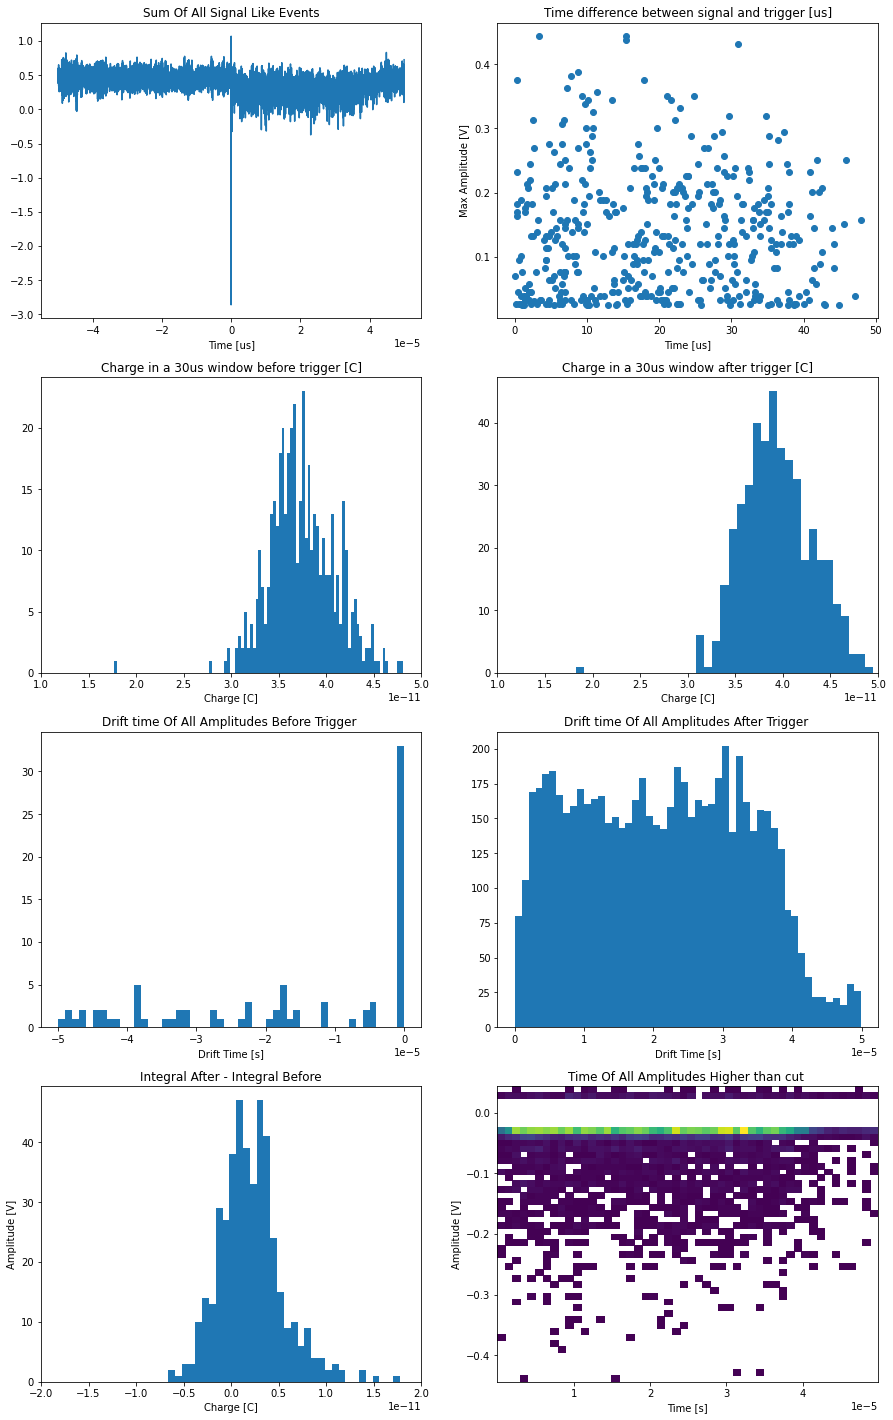

In [40]:
#plot events for "cut1" after the trigger

Int_bef_cut1 = []
Int_aft_cut1 = []
for i in range(len(cut1_idx)):
    Int_bef_cut1.append(0)
    Int_aft_cut1.append(0)
    

print (len(cut1_idx))



# for i in range(len(cut1_idx)):
#     int_norm_bef = 0
#     int_norm_aft = 0
#     for j in range(len(ampl_TPC[cut1_idx[i]])):
#         if (int_LowLim < time_TPC[i][j]  and time_TPC[i][j] < trig_offset -2e-6):
#             #Int_bef_cut1[i]+=abs(ampl_TPC[cut1_idx[i]][j]) * dt/(2*Impedance)
#             int_norm_bef+=1
#         if (int_UpLim < time_TPC[i][j]  and time_TPC[i][j]> trig_offset):
#             Int_aft_cut1[i]+=abs(ampl_TPC[cut1_idx[i]][j]) * dt/(2*Impedance)
#             int_norm_aft+=1
#     Int_bef_cut1[i]=Int_bef_cut1[i]/int_norm_bef
#     Int_aft_cut1[i]=Int_bef_cut1[i]/int_norm_aft

# On the left: This plots the sum of all the events passing the cut1 criterium
# On the right: The time difference between the maximum and the trigger of all the events which pass cut1


sig_trig_time = []
max_aft_cut1 = []
int_bef_cut1_dump = []
int_aft_cut1_dump = []

for i in range(len(cut1_idx)):
    sig_trig_time.append((Max_aft_time[cut1_idx[i]]-trig_offset)*1e6) 
    max_aft_cut1.append(Max_aft[cut1_idx[i]]) 
    int_bef_cut1_dump.append(Int_bef[cut1_idx[i]])
    int_aft_cut1_dump.append(Int_aft[cut1_idx[i]])
# plt.hist(sig_trig_time) 



ampl_sum = []
for i in range(len(ampl_TPC[1])):
    ampl_sum.append(0)
    
for i in range(len(cut1_idx)):
    for j in range(len(ampl_TPC[cut1_idx[i]])):
        ampl_sum[j]+=ampl_TPC[cut1_idx[i]][j]
    
fig, axes = plt.subplots(4, 2, figsize=(15, 25), sharey=False)

axes[0,0].plot(time_TPC[1],ampl_sum, color = 'C0')
axes[0,0].set(title = "Sum Of All Signal Like Events",xlabel = "Time [us]")
axes[0,1].scatter(sig_trig_time,max_aft_cut1 ,color = 'C0')
axes[0,1].set(title = "Time difference between signal and trigger [us]",xlabel = 'Time [us]', ylabel = "Max Amplitude [V]")


axes[1,0].hist(int_bef_cut1_dump, bins =100,color = 'C0')
axes[1,0].set(title = "Charge in a 30us window before trigger [C]",xlim = (1e-11,5e-11),xlabel = "Charge [C]")
axes[1,1].hist(int_aft_cut1_dump , bins =100,color = 'C0')
axes[1,1].set(title = "Charge in a 30us window after trigger [C]",xlim = (1e-11,5e-11),xlabel = 'Charge [C]')




axes[2,0].hist(big_ampl_bef_time_all,  bins=50 )
axes[2,0].set(title = "Drift time Of All Amplitudes Before Trigger ",xlabel = "Drift Time [s]" )
axes[2,1].hist(big_ampl_aft_time_all,  bins=50 )
axes[2,1].set(title = "Drift time Of All Amplitudes After Trigger ",xlabel = "Drift Time [s]" )


dum_list = []
zip_object = zip(int_aft_cut1_dump, int_bef_cut1_dump)
for int_aft_cut1_dump_i, int_bef_cut1_dump_i in zip_object:
    dum_list.append(int_aft_cut1_dump_i-int_bef_cut1_dump_i)


axes[3,0].hist(dum_list,  bins=100 )
axes[3,0].set(title = "Integral After - Integral Before",xlabel = "Charge [C]", xlim = (-2e-11,2e-11), ylabel = "Amplitude [V]")
axes[3,1].hist2d(big_ampl_aft_time_all,big_ampl_aft_all, bins=50, cmin =1)
axes[3,1].set(title = "Time Of All Amplitudes Higher than cut ",xlabel = "Time [s]", ylabel = "Amplitude [V]")

fig.savefig(path+"wf_sum.pdf")  


       

TypeError: 'list' object is not callable

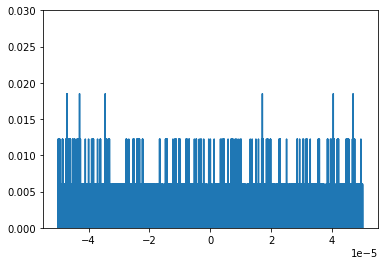

In [66]:
# #-------------------------------------------------------------------
# #this analysis investigates the event one by one, zooming in on the spikes. 
# #-------------------------------------------------------------------
plot_no = 6

plt.plot(time_TPC[cut1_idx[plot_no]],ampl_TPC[cut1_idx[plot_no]],  color = 'C0',label = "TPC")
plt.ylim(0, 0.03)
plt.xlim(( 0, 0.03))


dum_vb = 0
for j in range(len(big_ampl_aft[cut1_idx[plot_no]])):
     print ("amplitude is: ", big_ampl_aft[cut1_idx[plot_no]][j],"time is", big_ampl_aft_time[cut1_idx[plot_no]][j])
     dum_vb +=big_ampl_aft[cut1_idx[plot_no]][j] * dt/(2*Impedance*norm_aft)
print ("int before: ", Int_bef[cut1_idx[plot_no]],"int after", Int_aft[cut1_idx[plot_no]], " signal integral ", dum_vb)



In [8]:
# #-------------------------------------------------------------------
# #this analysis shows only plots with variables obtained "per-event". Like the maximum per event vs event number etc...
# #-------------------------------------------------------------------


# d = { 'evt_no':evt_no, 'Max_aft':Max_aft, 'Max_aft_time':Max_aft_time,'Max_bef':Max_bef, 'Max_bef_time':Max_bef_time,'Int_bef':Int_bef ,'Int_aft':Int_aft,'good_evt_flag':good_evt_flag}
# df = pd.DataFrame(d)
# fig, axes = plt.subplots(5, 2, figsize=(15, 30), sharey=False)


# fig0 = sns.histplot(df,ax=axes[0,0], x="Int_bef" ,hue="good_evt_flag",palette=["C1", "C0"],bins = 100 ).set(yscale = 'log')
# axes[0,0].set(xlabel = 'Waveform sum before trigger [mV]')

# fig0b = sns.histplot(df,ax=axes[0,1], x="Int_aft" ,hue="good_evt_flag",palette=["C1", "C0"], bins = 1000).set(yscale = 'log')
# axes[0,1].set(xlabel = 'Waveform sum after trigger [mV]')

# # fig1 = sns.histplot(df, ax = axes[1,0], x="Max_bef" , hue="good_evt_flag",palette=["C1", "C0"], bins = 50)
# # axes[1,0].set(xlabel = 'Max Amplitude Bef Trigger [mV]')

# # fig1b = sns.histplot(df, ax = axes[1,1], x="Max_aft" , hue="good_evt_flag", palette=["C1", "C0"],bins = 50)
# # axes[1,1].set(xlabel = 'Max Amplitude After Trigger [mV]')

# # fig2 = sns.histplot(df, ax = axes[2,0], x="Max_bef_time" ,hue="good_evt_flag",palette=["C1", "C0"], bins = 50)
# # axes[2,0].set(xlabel = 'Time at Which Maximum Occurs Before Trigger [s]')

# # fig2b = sns.histplot(df, ax = axes[2,1], x="Max_aft_time" ,hue="good_evt_flag",palette=["C1", "C0"], bins = 50)
# # axes[2,1].set(xlabel = 'Time at Which Maximum Occurs After Trigger [s]')

# fig3 = sns.histplot( df,ax=axes[3,0], x="evt_no", y = "Int_bef" ,hue="good_evt_flag",palette=["C1", "C0"], bins = 50)
# axes[3,0].set(ylabel = 'Integral bef trigger [mV]', xlabel = 'Event Number', ylim = (0,0.05))

# fig3b = sns.histplot(data = df,ax=axes[3,1], x="evt_no", y = "Int_aft" ,hue="good_evt_flag",palette=["C1", "C0"], bins = 50)
# axes[3,1].set(ylabel = 'Integral after trigger [mV]', xlabel = 'Event Number')

# fig4b = sns.histplot(df,ax=axes[4,0], x="Max_bef_time", y = "Max_bef" ,hue="good_evt_flag",palette=["C1", "C0"], bins = 50)
# axes[4,0].set(xlabel = 'Time [s] ',ylabel = 'Max Amplitude Before Trigger [mV]')

# fig4b = sns.histplot(df,ax=axes[4,1], x="Max_aft_time", y = "Max_aft" ,hue="good_evt_flag",palette=["C1", "C0"], bins = 50)
# axes[4,1].set(xlabel = 'Time [s] ',ylabel = 'Max Amplitude After Trigger [mV]')

# fig.savefig(path+"seaborn_integrals.pdf")


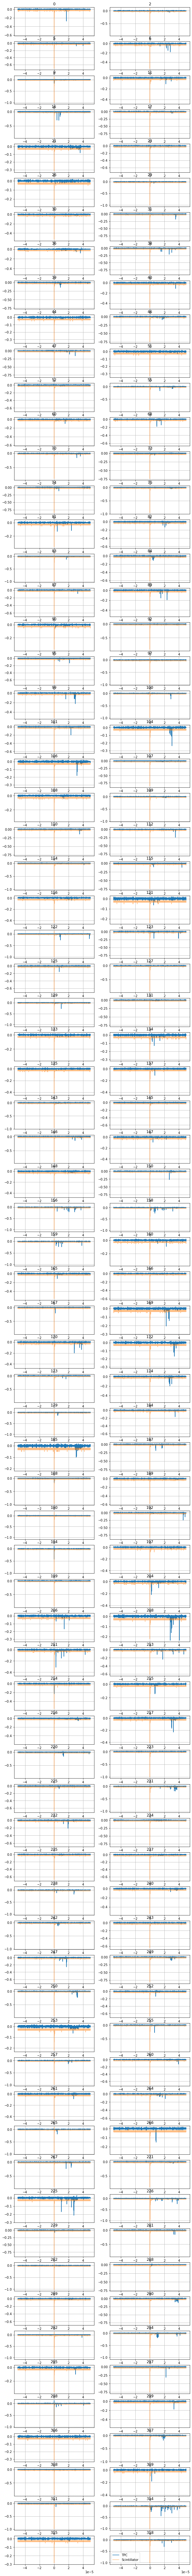

After Trigger
There are 443 / 959 signal like events after trigger. Including Spark Events. Cut > 0.02
There are 443 / 957 signal like events after trigger. Just Clean Events. Cut > 0.02
Ratio of 46.29049111807733 %


In [9]:
#plot events for "cut1" after the trigger
total_plots = 150
#sns C0 is blue and C1 is orange



if( total_plots > len(cut1_idx)): total_plots = len(cut1_idx)

plt.figure(figsize=(10,total_plots*2))

for i in range(0,total_plots):
            ax = plt.subplot(total_plots,2,i+1)
            plt.plot(time_TPC[cut1_idx[i]],ampl_TPC[cut1_idx[i]], color = 'C0',label = "TPC")
            plt.plot(time_TPC[cut1_idx[i]],ampl_Scint[cut1_idx[i]],  color = 'C1',label = "Scintillator" ,alpha = 0.5)
            #plt.xlim([4.90e-6,5.3e-6])
#             plt.plot(time_ScintDn[cut1_idx[i]],ampl_Scint[cut1_idx[i]], alpha = 0.8)
#             plt.plot(time_ScintDn[cut1_idx[i]],ampl_ScintDn[cut1_idx[i]], alpha = 0.8)
            ax.title.set_text(cut1_idx[i])
            ax.grid()
         
plt.legend()
        
plt.savefig(path+"good_events_afterTrig.pdf")            
plt.show()
print("After Trigger")
print ("There are", len(cut1_idx),"/", tot_evt, "signal like events after trigger. Including Spark Events. Cut >", cut_val )
print ("There are", len(cut1_idx),"/", good_evt_flag.count("Good Event"), "signal like events after trigger. Just Clean Events. Cut >", cut_val )
print("Ratio of",100*len(cut1_idx)/ good_evt_flag.count("Good Event"),"%")







(1.53e-05, 1.55e-05)

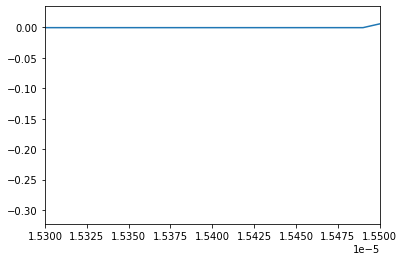

In [10]:
#--------------------
#zoom into good event
#--------------------

#let's take event  - single 0.2V peak


plt.plot(time_TPC[cut1_idx[6]],ampl_TPC[cut1_idx[6]], color = 'C0',label = "TPC")
plt.xlim(1.53e-5,1.55e-5)

# plt.plot(time_TPC[cut1_idx[10]],ampl_TPC[cut1_idx[10]], color = 'C0',label = "TPC")
# plt.xlim(1.53e-5,1.55e-5)


9
16
74
91
96
121
188
190
194
206
214
238
258
298
314
343
368
379
380
386
387
392
409
413
424
464
469
472
473
474
475
480
490
493
496
497
504
506
514
515
516
532
541
568
591
625
639
648
654
664
680
681
686
688
690
709
716
720
738
803
806
835
891
897


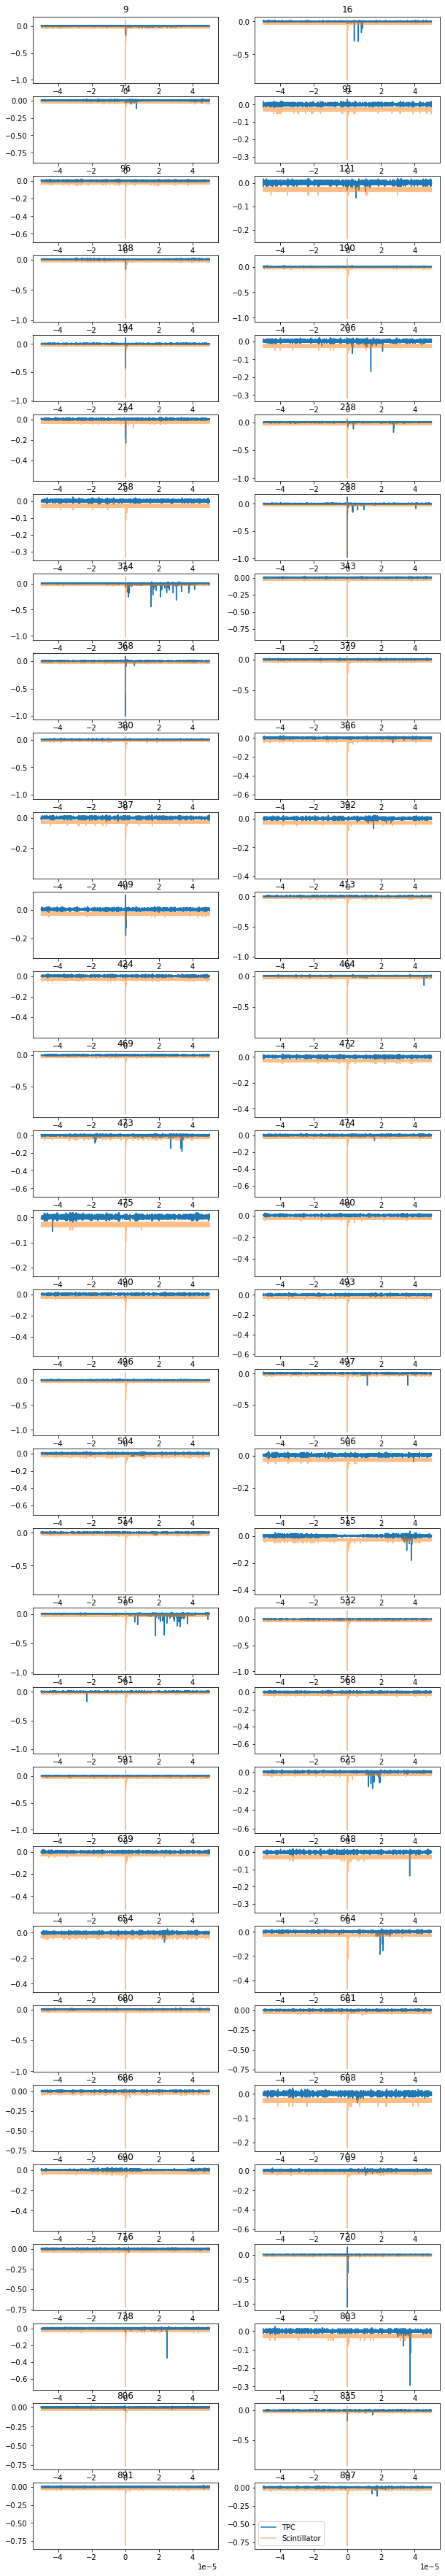

Before Trigger
There are 64 / 959 signal like events before trigger. Cut > 0.02
There are 64 / 957 signal like events after trigger. Just Clean Events. Cut > 0.02
Ratio of 6.687565308254963 %


In [11]:
#plot events for "cut2" after the trigger
total_plots = 150

if( total_plots > len(cut2_idx)): total_plots = len(cut2_idx)

plt.figure(figsize=(10,total_plots*2))


for i in range(0,total_plots):
            ax = plt.subplot(total_plots,2,i+1)
            plt.plot(time_ScintDn[cut2_idx[i]],ampl_TPC[cut2_idx[i]], color = 'C0', label = "TPC")
            plt.plot(time_TPC[cut2_idx[i]],ampl_Scint[cut2_idx[i]], color = 'C1',alpha = 0.5, label = "Scintillator")
            ax.title.set_text(cut2_idx[i])
            print(cut2_idx[i])
plt.legend()
plt.savefig(path+"good_events_beforeTrig.pdf")            
plt.show()


print("Before Trigger")
print ("There are", len(cut2_idx),"/", tot_evt, "signal like events before trigger. Cut >", cut_val  )
print ("There are", len(cut2_idx),"/", good_evt_flag.count("Good Event"), "signal like events after trigger. Just Clean Events. Cut >", cut_val )
print("Ratio of",100*len(cut2_idx)/ good_evt_flag.count("Good Event"),"%")





9590000    sadasdasd  9590000


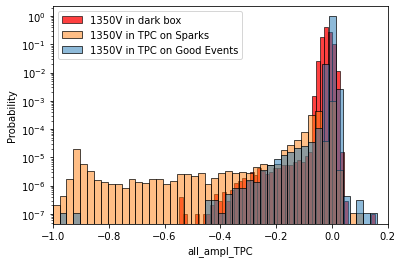

In [12]:
path_hama = "../Data_ExcelAcquisition/HamamatsuAna/dark_TPC_tr238_V1350_Amp2_5/"


in_evt = 0
tot_evt_hama = 1000       # 200
volt_lim = -0.009
sat_lim = 0.03


filetype = 0
f_hama = open(path_hama+"result.txt",'r')

ampl_hama = []
all_ampl_hama = []
time_hama = []

for i in range(tot_evt_hama):
    ampl_hama.append([])    
    time_hama.append([])


#read data and store them in a list of list
dis = f_hama.readlines()
f_hama.close()
for i in dis:
        evt_,ch_,time_,ampl_ = i.split(',')
        if (ch_ == "C4" and int(evt_) < tot_evt_hama):
                ampl_hama[int(evt_)].append(float(ampl_))
                time_hama[int(evt_)].append(float(time_))
                

for i in range(len(ampl_hama)):
    for j in range (len(ampl_hama[i])):
        all_ampl_hama.append(ampl_hama[i][j])
   
print (len(all_ampl_TPC), "   sadasdasd ", len (all_good_evt_flag))

d2 = { 'all_ampl_TPC':all_ampl_TPC, 'all_good_evt_flag':all_good_evt_flag}
df2 = pd.DataFrame(d2)

ax1 = sns.histplot(all_ampl_hama, bins = 50, stat = 'probability' , color  = 'red', legend = 'True', label = '1350V dark box').set(xlim = (-1,0.2), yscale = 'log')
#ax1 = sns.histplot(all_ampl_TPC, bins = 250, stat = 'count', alpha = 0.3).set( yscale = 'log', label = '1350V TPC On')

sns.histplot(df2, x="all_ampl_TPC" ,hue="all_good_evt_flag", bins = 50, stat = 'probability' ).set(yscale = 'log')
#ax1.set(xlabel = 'Integral before trigger [mV]', xlim = (0.015,0.029))

plt.legend(labels = ['1350V in dark box','1350V in TPC on Sparks','1350V in TPC on Good Events'])
# handles = legend.legendHandles
# legend.remove()
# ax1.legend(handles, ['dep-', 'ind-', 'ind+', 'dep+'], title='Stat.ind.')
# plt.show()


In [13]:
#------------------------------------
#conversion from amplitude to photon count 
#------------------------------------
#  PAY ATENTION AT THE dt VARIABLE AS THIS CHANGE DEPENDING ON THE SAMPLING RATE
#  THE VOLTAGE MEASURE ON THE SCOPE IS: V
gain = 2.5e6 # gain estimated for 1350V
qe = 0.25 #quantum efficiency of the pmt
col_eff = 0.8 # colection efficiency
R = 50 #ohms imput impedance
e_ch = 1.6e-19 #coulomb
dt = 100e-6/10e3 #
V = 0.05 # same event as before 


ampl = 3 # the amplifier settings
C = (V/ (ampl * R)) *dt
C/e_ch #number of electrons produced after last dynode
C/(e_ch * gain) # number of electrons produced in the first dynode
C/(e_ch * gain * col_eff) # number of photoelectrons reaching the first dynode
C/(e_ch * gain * col_eff* qe) #number of photons hitting the photocathode

print ("the number of electrons produced at first dynode " ,C/(e_ch * gain ),", corresponding to a measured voltage of ", V)
print ("the number of photons hitting the photocathode is " ,C/(e_ch * gain  *col_eff *qe), ", corresponding to a measured voltage of ", V)
print ("the voltage corresponding to a thermal emission is: ", 1e3*e_ch*gain * ampl * R /dt, "mV")





#time at the end of program execution is noted
end = time.time()

#total time taken to print the file
print("Execution time in minutes: ",(end - start)/60)


the number of electrons produced at first dynode  8.333333333333336 , corresponding to a measured voltage of  0.05
the number of photons hitting the photocathode is  41.66666666666667 , corresponding to a measured voltage of  0.05
the voltage corresponding to a thermal emission is:  5.999999999999999 mV
Execution time in minutes:  1.874109137058258
